In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

---
# Pré Processamento

### S03T02 - Normalizar ou padronizar colunas numéricas.S03T02 - Normalizar ou padronizar colunas numéricas.

In [3]:
df_tratado = pd.read_csv('data_root/df_limpo.csv',index_col=0)
df_tratado

,magnitude,data,hora,periodo,subnational,city,depth,felt,continent,latitude,longitude,mmi,cdi,impacto,magnitude_range,media por magnitude
0,4.8,2024-09-17,00:49:42,Noite,Texas,Tarzan-Lenorah,4.0440,1893,North America,32.3984,-102.0440,5,6,Baixo,4-5,8.028601
1,5.1,2024-09-17,00:49:42,Noite,Texas,Tarzan-Lenorah,6.1279,2042,North America,32.4140,-102.0570,5,6,Médio,5-6,10.632600
2,3.7,2024-09-16,11:22:08,Manhã,California,Los Angeles,10.9000,1580,North America,34.0678,-118.8070,4,4,Baixo,3-4,8.433737
3,3.9,2024-09-14,17:01:06,Tarde,Texas,Van Horn,6.2024,5,North America,31.6470,-104.4500,4,3,Baixo,3-4,8.433737
4,4.1,2024-09-14,17:01:06,Tarde,Texas,Van Horn,8.8140,4,North America,31.6323,-104.4730,4,3,Baixo,4-5,8.028601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,5.9,2023-10-07,07:40:30,Manhã,Herat,Zindah Jan,12.4800,3,Asia,34.6391,62.0327,7,5,Médio,5-6,10.632600
532,6.3,2023-10-07,07:12:49,Manhã,Herat,Zindah Jan,8.0000,11,Asia,34.5492,61.8840,8,9,Alto,6-7,9.916667
533,5.4,2023-10-07,06:49:41,Manhã,Herat,Zindah Jan,10.2570,0,Asia,34.5414,61.9547,7,0,Médio,5-6,10.632600
534,6.3,2023-10-07,06:41:03,Manhã,Herat,Zindah Jan,14.0000,19,Asia,34.6259,61.9260,8,8,Alto,6-7,9.916667


In [4]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 0 to 535
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   magnitude            536 non-null    float64
 1   data                 536 non-null    object 
 2   hora                 536 non-null    object 
 3   periodo              536 non-null    object 
 4   subnational          536 non-null    object 
 5   city                 536 non-null    object 
 6   depth                536 non-null    float64
 7   felt                 536 non-null    int64  
 8   continent            536 non-null    object 
 9   latitude             536 non-null    float64
 10  longitude            536 non-null    float64
 11  mmi                  536 non-null    int64  
 12  cdi                  536 non-null    int64  
 13  impacto              536 non-null    object 
 14  magnitude_range      536 non-null    object 
 15  media por magnitude  536 non-null    float64


In [5]:
# Tratando a coluna 'magnitude_range': Convertendo para valores médios
def intervalo_para_media(intervalo):
    limites = intervalo.split('-')
    return (float(limites[0]) + float(limites[1])) / 2

df_tratado['magnitude_range'] = df_tratado['magnitude_range'].apply(intervalo_para_media)
display(df_tratado['magnitude_range'])

0      4.5
1      5.5
2      3.5
3      3.5
4      4.5
      ... 
531    5.5
532    6.5
533    5.5
534    6.5
535    5.5
Name: magnitude_range, Length: 536, dtype: float64

In [6]:
# Definindo as colunas numéricas que serão normalizadas
colunas_numericas = ['magnitude', 'depth', 'felt', 'latitude', 'longitude', 
                     'mmi', 'cdi', 'magnitude_range', 'media por magnitude']


In [7]:
# Aplicando a normalização (Min-Max Scaling)
scaler = MinMaxScaler()
df_normalizado = df_tratado.copy()
df_normalizado[colunas_numericas] = scaler.fit_transform(df_tratado[colunas_numericas])


In [8]:
# Visualizando o resultado
print("Dados Normalizados:")
display(df_normalizado)

Dados Normalizados:


,magnitude,data,hora,periodo,subnational,city,depth,felt,continent,latitude,longitude,mmi,cdi,impacto,magnitude_range,media por magnitude
0,0.439024,2024-09-17,00:49:42,Noite,Texas,Tarzan-Lenorah,0.146463,0.010300,North America,0.680375,0.174349,0.333333,0.666667,Baixo,0.428571,0.194508
1,0.512195,2024-09-17,00:49:42,Noite,Texas,Tarzan-Lenorah,0.217542,0.011111,North America,0.680515,0.174310,0.333333,0.666667,Médio,0.571429,0.394815
2,0.170732,2024-09-16,11:22:08,Manhã,California,Los Angeles,0.380312,0.008597,North America,0.695300,0.124643,0.166667,0.444444,Baixo,0.285714,0.225672
3,0.219512,2024-09-14,17:01:06,Tarde,Texas,Van Horn,0.220083,0.000027,North America,0.673658,0.167214,0.166667,0.333333,Baixo,0.285714,0.225672
4,0.268293,2024-09-14,17:01:06,Tarde,Texas,Van Horn,0.309162,0.000022,North America,0.673526,0.167146,0.166667,0.333333,Baixo,0.428571,0.194508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,0.707317,2023-10-07,07:40:30,Manhã,Herat,Zindah Jan,0.434204,0.000016,Asia,0.700407,0.660871,0.666667,0.555556,Médio,0.571429,0.394815
532,0.804878,2023-10-07,07:12:49,Manhã,Herat,Zindah Jan,0.281397,0.000060,Asia,0.699603,0.660430,0.833333,1.000000,Alto,0.714286,0.339744
533,0.585366,2023-10-07,06:49:41,Manhã,Herat,Zindah Jan,0.358381,0.000000,Asia,0.699534,0.660639,0.666667,0.000000,Médio,0.571429,0.394815
534,0.804878,2023-10-07,06:41:03,Manhã,Herat,Zindah Jan,0.486050,0.000103,Asia,0.700289,0.660554,0.833333,0.888889,Alto,0.714286,0.339744


### S03T03 - Transformar variáveis categóricas em numéricas (one-hot encoding, label encoding, etc.).

In [9]:
# Transformar variáveis categóricas em numéricas (one-hot encoding, label encoding, etc.)

le = LabelEncoder()
df_normalizado["label_periodo"] = le.fit_transform(df_tratado['periodo'])
df_normalizado["label_continente"] = le.fit_transform(df_tratado['continent'])
df_normalizado["label_impacto"] = le.fit_transform(df_tratado['impacto'])
df_normalizado

,magnitude,data,hora,periodo,subnational,city,depth,felt,continent,latitude,longitude,mmi,cdi,impacto,magnitude_range,media por magnitude,label_periodo,label_continente,label_impacto
0,0.439024,2024-09-17,00:49:42,Noite,Texas,Tarzan-Lenorah,0.146463,0.010300,North America,0.680375,0.174349,0.333333,0.666667,Baixo,0.428571,0.194508,1,3,1
1,0.512195,2024-09-17,00:49:42,Noite,Texas,Tarzan-Lenorah,0.217542,0.011111,North America,0.680515,0.174310,0.333333,0.666667,Médio,0.571429,0.394815,1,3,2
2,0.170732,2024-09-16,11:22:08,Manhã,California,Los Angeles,0.380312,0.008597,North America,0.695300,0.124643,0.166667,0.444444,Baixo,0.285714,0.225672,0,3,1
3,0.219512,2024-09-14,17:01:06,Tarde,Texas,Van Horn,0.220083,0.000027,North America,0.673658,0.167214,0.166667,0.333333,Baixo,0.285714,0.225672,2,3,1
4,0.268293,2024-09-14,17:01:06,Tarde,Texas,Van Horn,0.309162,0.000022,North America,0.673526,0.167146,0.166667,0.333333,Baixo,0.428571,0.194508,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,0.707317,2023-10-07,07:40:30,Manhã,Herat,Zindah Jan,0.434204,0.000016,Asia,0.700407,0.660871,0.666667,0.555556,Médio,0.571429,0.394815,0,1,2
532,0.804878,2023-10-07,07:12:49,Manhã,Herat,Zindah Jan,0.281397,0.000060,Asia,0.699603,0.660430,0.833333,1.000000,Alto,0.714286,0.339744,0,1,0
533,0.585366,2023-10-07,06:49:41,Manhã,Herat,Zindah Jan,0.358381,0.000000,Asia,0.699534,0.660639,0.666667,0.000000,Médio,0.571429,0.394815,0,1,2
534,0.804878,2023-10-07,06:41:03,Manhã,Herat,Zindah Jan,0.486050,0.000103,Asia,0.700289,0.660554,0.833333,0.888889,Alto,0.714286,0.339744,0,1,0


### S03T05 - Criar novas features relevantes para o problema.

In [10]:
# Indicando o impacto relativo do terremoto.
df_normalizado['magnitude_por_depth'] = df_tratado['magnitude'] / (df_tratado['depth'] + 1e-5)

# Relaçao entre Magnitude e Profundidade
df_normalizado["factor_magnitude_depth"] = df_tratado['magnitude'] * df_tratado['depth']

# Quadrado da Magnitude
df_normalizado['magnitude_quadrada'] = df_tratado['magnitude'] ** 2

# Normalizando com (Min - Max Scaling as novas features)
new_features = ['magnitude_por_depth', 'factor_magnitude_depth', 'magnitude_quadrada']
df_normalizado[new_features] = scaler.fit_transform(df_normalizado[new_features])

In [11]:
display(df_normalizado)

,magnitude,data,hora,periodo,subnational,city,depth,felt,continent,latitude,...,cdi,impacto,magnitude_range,media por magnitude,label_periodo,label_continente,label_impacto,magnitude_por_depth,factor_magnitude_depth,magnitude_quadrada
0,0.439024,2024-09-17,00:49:42,Noite,Texas,Tarzan-Lenorah,0.146463,0.010300,North America,0.680375,...,0.666667,Baixo,0.428571,0.194508,1,3,1,0.346404,0.117914,0.339049
1,0.512195,2024-09-17,00:49:42,Noite,Texas,Tarzan-Lenorah,0.217542,0.011111,North America,0.680515,...,0.666667,Médio,0.571429,0.394815,1,3,2,0.337334,0.187091,0.410770
2,0.170732,2024-09-16,11:22:08,Manhã,California,Los Angeles,0.380312,0.008597,North America,0.695300,...,0.444444,Baixo,0.285714,0.225672,0,3,1,0.324733,0.240123,0.113258
3,0.219512,2024-09-14,17:01:06,Tarde,Texas,Van Horn,0.220083,0.000027,North America,0.673658,...,0.333333,Baixo,0.285714,0.225672,2,3,1,0.332132,0.145829,0.149964
4,0.268293,2024-09-14,17:01:06,Tarde,Texas,Van Horn,0.309162,0.000022,North America,0.673526,...,0.333333,Baixo,0.428571,0.194508,2,3,1,0.327948,0.215630,0.188602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,0.707317,2023-10-07,07:40:30,Manhã,Herat,Zindah Jan,0.434204,0.000016,Asia,0.700407,...,0.555556,Médio,0.571429,0.394815,0,1,2,0.328142,0.434676,0.623279
532,0.804878,2023-10-07,07:12:49,Manhã,Herat,Zindah Jan,0.281397,0.000060,Asia,0.699603,...,1.000000,Alto,0.714286,0.339744,0,1,0,0.336190,0.298953,0.741125
533,0.585366,2023-10-07,06:49:41,Manhã,Herat,Zindah Jan,0.358381,0.000000,Asia,0.699534,...,0.000000,Médio,0.571429,0.394815,0,1,2,0.329516,0.328092,0.486839
534,0.804878,2023-10-07,06:41:03,Manhã,Herat,Zindah Jan,0.486050,0.000103,Asia,0.700289,...,0.888889,Alto,0.714286,0.339744,0,1,0,0.327560,0.519783,0.741125


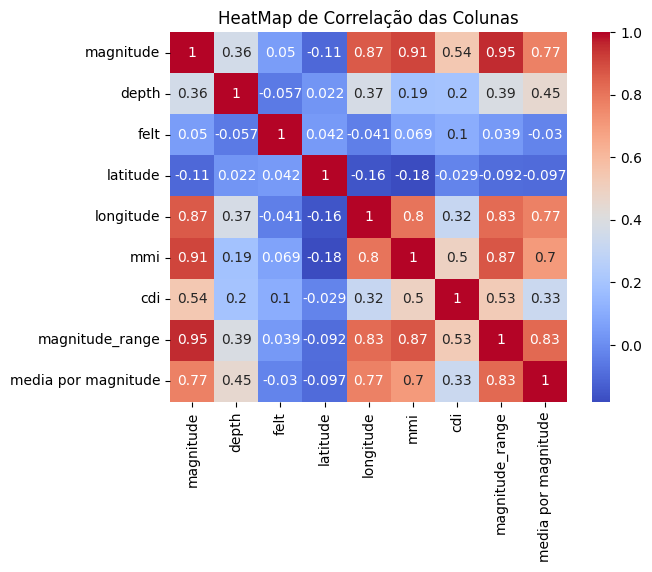

In [14]:
# Grafico para ver os dados das colunas criadas
#fig = px.box(df_normalizado, x=["magnitude_por_depth", "factor_magnitude_depth", "magnitude_quadrada"])
#fig.show

# Selecionando unicamente colunas númericas
numeric_cols = df_tratado.select_dtypes(include=['number']).columns

# Calculando a matriz de correlação
corr_matrix = df_tratado[numeric_cols].corr()

# Criando um heatmap com os argumentos corretos
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('HeatMap de Correlação das Colunas')
plt.show()